In [2]:
%reload_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import numpy as np
import dill
from tqdm import tqdm
import sys
import os
import gc

# Get the current working directory
current_dir = os.getcwd()
# Add the parent directory to sys.path
sys.path.append(os.path.dirname(current_dir))

In [3]:
from analyze.report import draw_rate_vs_angle_pop

/home/utente/sl_plots/hears_env_linux/lib/python3.12/site-packages/setuptools/_distutils/_msvccompiler.py:12: UserWarning: _get_vc_env is private; find an alternative (pypa/distutils#340)
  warnings.warn(


In [4]:
# List directory contents
result_dir = '/mnt/c/Users/utente/OneDrive - Politecnico di Milano/work/sound_localization/sl_results/'
items = os.listdir(result_dir)
for item in items:
    print(item) 


clicks_1000_XXdB&TanCarney&subject_1.pic
DOUBLEEXC2LSO_tone_10.kHz_70dB&TanCarney&subject_1.pic
DOUBLEEXC2LSO_tone_300.Hz_70dB&TanCarney&subject_1.pic
harmonic_69dB&TanCarney&subject_1.pic
tone_0.1kHz_70dB&TanCarney&ild_only.pic
tone_0.1kHz_70dB&TanCarney&itd_only.pic
tone_0.1kHz_70dB&TanCarney&itd_only_myoga_inv.pic
tone_0.1kHz_70dB&TanCarney&itd_only_myoga_null.pic
tone_0.1kHz_70dB&TanCarney&itd_only_no_MSO_inh.pic
tone_0.1kHz_70dB&TanCarney&subject_1.pic
tone_0.1kHz_70dB&TanCarney&subject_1_myoga_inv.pic
tone_0.1kHz_70dB&TanCarney&subject_1_myoga_null.pic
tone_0.1kHz_70dB&TanCarney&subject_1_no_MSO_inh.pic
tone_0.1kHz_70dB&TanCarney&subject_2.pic
tone_0.2kHz_70dB&TanCarney&subject_1.pic
tone_0.2kHz_70dB&TanCarney&subject_1_long.pic
tone_0.3kHz_70dB&TanCarney&subject_1.pic
tone_0.4kHz_70dB&TanCarney&subject_1.pic
tone_0.5kHz_70dB&TanCarney&subject_1.pic
tone_0.6kHz_70dB&TanCarney&subject_1.pic
tone_0.7kHz_70dB&TanCarney&subject_1.pic
tone_0.8kHz_70dB&TanCarney&subject_1.pic
tone_0.9k

In [8]:
f = 'tone_1.kHz'
cf_interval = [20, 20000]

Processing tone_1.kHz_70dB&TanCarney&itd_only.pic...


Processed and plotted Control
Processing tone_1.kHz_70dB&TanCarney&itd_only_no_MSO_inh.pic...


UnpicklingError: pickle data was truncated

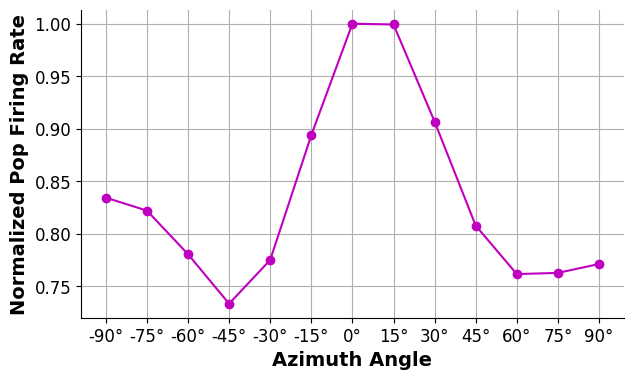

In [9]:
# Create a single figure and axis that will be shared by all datasets
fig, ax = plt.subplots(figsize=(7, 4))

file_infos = [
    {
        "path": result_dir + f"{f}_70dB&TanCarney&itd_only.pic",
        "label": "Control",
        "color": "m"
    },
    {
        "path": result_dir + f"{f}_70dB&TanCarney&itd_only_no_MSO_inh.pic",
        "label": "Blockage",
        "color": "k"
    }
]

# Process and plot one file at a time, all on the same axis
for info in file_infos:
    print(f"Processing {info['path'].split('/')[-1]}...")
    
    # Load single file
    with open(info["path"], "rb") as file:
        result = dill.load(file, ignore=True)
    
    # Pass the axis to the function and specify the color and label
    draw_rate_vs_angle_pop(
        data=result,
        color=info["color"],
        pop='MSO',
        cf_interval=cf_interval,
        rate=False,
        sides='L',
        norm = True,
        ax=ax,  # Pass the existing axis
        title=""  # No title for individual plots
    )
    
    # Update the line's label in the legend to match our file info
    # Get the most recently added line and set its label
    ax.get_lines()[-1].set_label(info["label"])
    
    # Free memory
    del result
    gc.collect()
    print(f"Processed and plotted {info['label']}")

# Finalize the plot
ax.legend()
plt.tight_layout()
plt.show()

# Explicitly close the figure
plt.close()
gc.collect()
print("Done")